# Klasa wierzchołka - Vertex

In [40]:
class Vertex:
    """
    Klasa reprezentujaca wierzcholek
    """
    id: int
    visited: bool

    def __init__(self, given_id: int = None, visited: bool = False) -> None:
        """
        Inicjalizacja wierzcholka
        :param given_id: id wierzcholka czyli jego numer
        :param visited: czy odwiedzony
        """
        self.id = given_id
        self.visited = visited

    def __hash__(self) -> int:
        """
        <! Wymagane bo inaczej blad unhashable type !>
        Hashuje id wierzcholka
        :return: zwraca zhashowany numer (id) wierzcholka
        """
        return hash(self.id)

    def get_id(self) -> int:
        """
        Zwraca id wierzcholka (numer)
        :return: id wierzcholka
        """
        return self.id

# Klasa krawędzi - Edge

In [41]:
class Edge:
    """
    Klasa reprezentujaca krawedz
    """
    vertices: tuple
    weight: int
    visited: bool

    def __init__(self, first_vertex: Vertex, second_vertex: Vertex, weight: int = 1, visited: bool = False) -> None:
        """
        Inicjalizacja krawedzi
        :param first_vertex: id pierwszego wierzcholka
        :param second_vertex: id drugiego wierzcholka
        :param weight: waga krawedzi
        :param visited: czy krawedz odwiedzona
        """
        self.vertices = (first_vertex, second_vertex)
        self.visited = visited
        self.weight = weight

    def get_vertices_ids(self) -> tuple:
        """
        Zwraca tuple wierzchołków, które krawędź łączy
        """
        return self.vertices

    def get_weight(self) -> int:
        """
        Zwraca wagę krawędzi
        """
        return self.weight

# Klasa grafu - Graph

In [42]:
import pickle
from typing import List, Set


class Graph:
    """
       Klasa reprezentujaca Graf
    """
    edges: List[Edge]
    vertices: Set[Vertex]
    weighted: bool

    def __init__(self, edges: List[Edge] = None, vertices: Set[Vertex] = None, weighted=False):
        """
        Inicjalizacja grafu
        :param edges: krawedzie
        :param vertices: wezly
        :param weighted: czy krawedzie maja wagi
        """
        if edges is None:
            edges = []
        if vertices is None:
            vertices = set()
        self.edges = edges
        self.vertices = vertices
        self.weighted = weighted

    def add_vertex(self, vertex: Vertex):
        """
        Dodaje nowy wezel
        :param vertex: wezel
        """
        self.vertices.add(vertex)

    def add_edges(self, edges: Set[tuple]):
        """
        Dodaje krawedzie
        :param edges: zbior tupli wierzcholkow lub wierzcholkow i wagi
        """
        for edge in edges:
            # tutaj dodajemy krawedzie do grafu
            has_edge = None
            for x in self.edges:
                # jesli krawedz juz zostala dodana do grafu to wychodzimy z wewnetrznej petli i
                # sprawdzamy kolejna krawedz ze zbioru krawedzi ktore chcemy dodac
                if (x.get_vertices_ids()[0] == edge[1] and x.get_vertices_ids()[1] == edge[0]) or (
                        x.get_vertices_ids()[0] == edge[0] and x.get_vertices_ids()[1] == edge[1]):
                    has_edge = x
                    break
            # jesli nie to dodajemy brakujaca krawedz
            if has_edge is None:
                if self.weighted:
                    self.edges.append(Edge(edge[0], edge[1], edge[2]))
                else:
                    self.edges.append(Edge(edge[0], edge[1]))

    def get_edges(self) -> List[Edge]:
        """
        Zwraca liste krawedzi
        """
        return self.edges

    def get_vertices(self) -> Set[Vertex]:
        """
        Zwraca zbior wezlow
        """
        return self.vertices

    def dfs(self, temp: List[int], v: int, visited: List[bool]) -> List[int]:
        """
        Algorytm przeszukiwania w glab
        :return: lista wierzcholkow tworzacych spojna skladowa
        """
        # ustaw obecny wierzcholek na odwiedzony
        visited[v] = True

        # dodaj wierzcholek do listy
        temp.append(v)

        # znajdujemy sasiadow wierzcholka v
        list_of_neigbours = self.find_neighbours(v)

        # powtorz dla kazdego wierzcholka bedacego sasiadem v ktorego jeszcze nie odwiedzilismy
        for i in list_of_neigbours:
            if not visited[i]:
                # zaktualizuj liste
                temp = self.dfs(temp, i, visited)
        return temp

    def connected_components(self) -> List[List[int]]:
        """
        Zwraca liste spojnych skladowych
        """
        visited = [False] * len(self.get_vertices())
        components = []
        for v in range(len(self.get_vertices())):
            if not visited[v]:
                temp = []
                components.append(self.dfs(temp, v, visited))
        return components

    def is_consistent(self) -> bool:
        """
        Sprawdza czy graf jest spojny
        :return: prawda/falsz
        """
        # jezeli graf ma jedna spojna skladowa -> jest spojny
        return len(self.connected_components()) == 1

    def is_weighted(self) -> bool:
        """
        Zwraca informacje czy krawedzie grafu maja wagi
        :return: prawda/falsz
        """
        return self.weighted

    def find_neighbours(self, vertex_id) -> List[int]:
        """
        Znajduje sasiadow danego wierzcholka w zadanym grafie
        :param vertex_id: id wierzcholka, dla ktorego znajdujemy sasiadow
        :return: lista sasiadow
        """
        neighbours = []
        edges = self.get_edges()
        for edge in edges:
            tuple_of_vertices = edge.get_vertices_ids()
            # jezeli wierzcholek obecny w krawedzi, drugi wierzcholek jest jego sasiadem
            if tuple_of_vertices[0].get_id() == vertex_id:
                neighbours.append(tuple_of_vertices[1].get_id())
                continue
            # analogicznie
            if tuple_of_vertices[1].get_id() == vertex_id:
                neighbours.append(tuple_of_vertices[0].get_id())
                continue
        return neighbours

    def find_edge(self, first_vertex: int, second_vertex: int) -> Edge:
        """
        Znajduje i zwraca krawedz dwoch wierzcholkow
        """
        for edge in self.get_edges():
            vertices = edge.get_vertices_ids()
            vertex_1 = vertices[0].get_id()
            vertex_2 = vertices[1].get_id()
            if (vertex_1 == first_vertex and vertex_2 == second_vertex) or (
                    vertex_1 == second_vertex and vertex_2 == first_vertex):
                return edge

    def save_to_file(self, filename: str = 'graph.txt') -> None:
        """
        Funkcja zapisuje graf do pliku txt
        """
        file = open(filename, 'wb')
        pickle.dump(self, file)
        file.close()


    def load_from_file(filename: str):
        """
        Funkcja odczytuje graf z pliku txt
        """
        file = open(filename, 'rb')
        return pickle.load(file)

# Zadanie 1. Implementacja

In [43]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [155]:
from Graph import Graph
from Edge import Edge
from Vertex import Vertex
from itertools import combinations
from random import sample, randint
import matplotlib.pyplot as plt
import networkx as nx


def create_rand_consistent_weighted_graph(n: int = 5) -> Graph:
    """
    Funkcja tworzaca spojny graf losowy o zadanej liczbie wierczholkow i krawedziach o wadze pomiedzy
    weight_min a weight_max
    :param n: liczba wierzcholkow
    :return: gotowy graf
    """

    if not isinstance(n, int):
        return
    # przedzialy wag narzucone w poleceniu do zadania
    weight_min: int = 1
    weight_max: int = 10
    
    if n < 0:
        n = 0
    
    vertices = set([v for v in range(n)])  # zbior numerow wierzcholkow
    edges = set()  # zbior krawedzi (tupli o 3 polach) zlozonych z 2 wierczholkow i losowej wagi

    min_edges = n - 1  # minimalna liczba krawedzi
    max_edges = (n * (n - 1)) / 2  # maksymalna liczba krawedzi

    # losujemy liczbe krawedzi z przedzialu <min, max> (wlacznie)
    try :
        nr_of_edges = randint(min_edges, max_edges)
        if nr_of_edges < 0:
            nr_of_edges = 0
    except ValueError:
        nr_of_edges = 0
    print(f"Liczba wierzchołków: {n}\nLiczba krawędzi: {nr_of_edges}")
    
    if n <= 0:
        return Graph()

    while True:
        # stworzenie wszystkich mozliwych 2-elementowych kombinacji wierzcholkow w postaci tupli
        vertex_comb = combinations(vertices, 2)

        # losowe wybranie kombinacji 2 wierzcholkow z listy vertex_comb, 'nr_of_edges' razy, czyli dla kazdej krawedzi
        rand_comb = sample(list(vertex_comb), nr_of_edges)

        # dodajemy do zbioru 'edges', tuple z wierzcholkami i waga
        for comb in rand_comb:
            edges.add((Vertex(comb[0]),
                       Vertex(comb[1]),
                       randint(weight_min, weight_max)))

        # tworzymy pusty graf wazony
        graph = Graph(weighted=True)

        # dodajemy wszystkie wierzcholki
        for vertex_id in vertices:
            graph.add_vertex(Vertex(vertex_id))

        # dodajemy krawedzie z naszych kombinacji
        graph.add_edges(edges)

        # powtarzamy proces dopoki graf nie bedzie spojny
        if graph.is_consistent():
            return graph


def draw(graph: Graph =None, filename: str =None):
    """
    Funkcja odpowiada za narysowanie grafu
    :param graph: graf do narysowania
    :param filename: opcjonalna nazwa pliku do zapisu w nim rysunku
    """
    if not isinstance(graph, Graph) or graph is None:
        return
    # pusty graf
    nx_graph = nx.Graph()

    # dodanie wierzcholkow do grafu
    for vertex in graph.get_vertices():
        nx_graph.add_node(vertex.get_id())

    # dodanie krawedzi do grafu
    for edge in graph.get_edges():
        vertices_ids = edge.get_vertices_ids()
        if graph.is_weighted():
            nx_graph.add_edge(vertices_ids[0].get_id(), vertices_ids[1].get_id(), weight=edge.get_weight())
        else:
            nx_graph.add_edge(vertices_ids[0].get_id(), vertices_ids[1].get_id())

    # ustawienie numerow wierzcholkow
    labels = {}
    color_map = []
    for i in range(len(graph.get_vertices())):
        color_map.append('orange')
        labels[i] = i
    # pozycjonowanie na okregu
    pos = nx.circular_layout(nx_graph)  
    
    # narysowanie grafu
    nx.draw(nx_graph,  pos, node_color=color_map, labels=labels)

    # dodanie wag krawedzi do rysunku
    if graph.is_weighted():
        nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=nx.get_edge_attributes(nx_graph, "weight"),
                                     label_pos=0.5)

    plt.axis("equal")  # symetrycznosc

    # ewentualny zapis do pliku
    if filename is not None:
        plt.savefig(filename, format="png")
    plt.show()

    # wyczyszczenie
    plt.clf()

   # Zadanie 1. - przykład wywołania

### Funkcja *create_rand_consistent_weighted_graph()* przyjmuje parametr będący liczbą wierzchołków, z których stworzy spójny losowy graf ważony. Wywołanie funkcji bez podania argumentu, poskutkuje użyciem domyślnego parametru ustawionego na wartość 5 a wywołanie z błędnym argumentem - zakończeniem działania funkcji poprzez instrukcję "return".

### Z kolei funkcja *draw()* przyjmuje jako parametr obiekt typu Graph. Wywołanie funkcji bez podania argumentu bądź z podaniem błędnego argumentu, poskutkuje zakończeniem funkcji instrukcją "return".

### Przykład poprawnego wywołania:


Zestaw 3, zadanie 1 - spójny losowy graf ważony:
Liczba wierzchołków: 8
Liczba krawędzi: 25


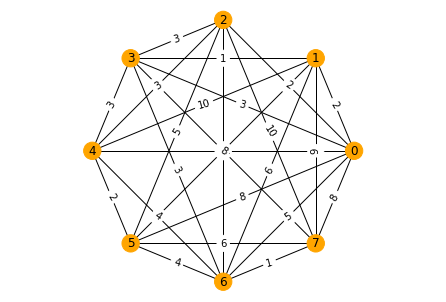

<Figure size 432x288 with 0 Axes>

In [101]:
print("\nZestaw 3, zadanie 1 - spójny losowy graf ważony:")
graph = create_rand_consistent_weighted_graph(8)
draw(graph)

### *Testowanie innych wywołań:

Liczba wierzchołków: 5
Liczba krawędzi: 6


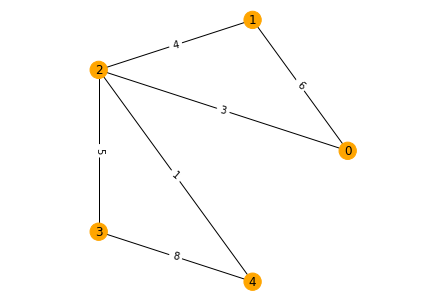

Liczba wierzchołków: 0
Liczba krawędzi: 0


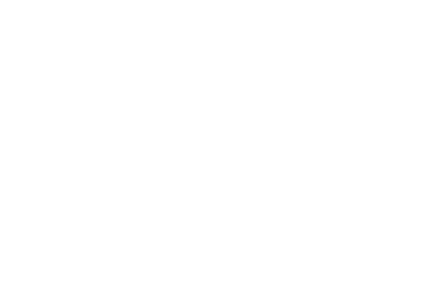

Liczba wierzchołków: 0
Liczba krawędzi: 0


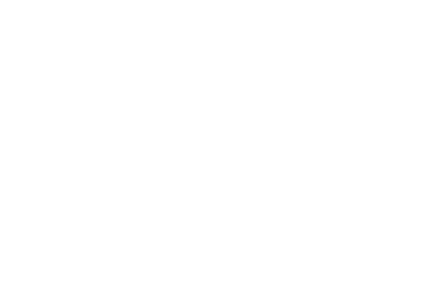

<Figure size 432x288 with 0 Axes>

In [157]:
draw(create_rand_consistent_weighted_graph())
draw(create_rand_consistent_weighted_graph(0))
draw(create_rand_consistent_weighted_graph(-5))
create_rand_consistent_weighted_graph("") # przerwanie returnem

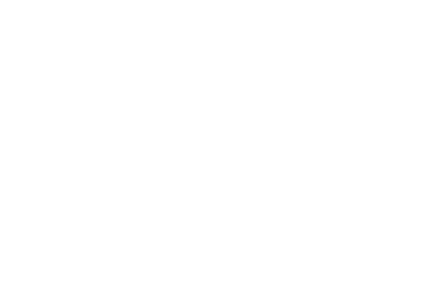

<Figure size 432x288 with 0 Axes>

In [156]:
draw(None) # nic
draw(1) # nic
draw("sth") # nic
draw() # nic
draw(Graph()) # pusta figura

Liczba wierzchołków: 2
Liczba krawędzi: 1


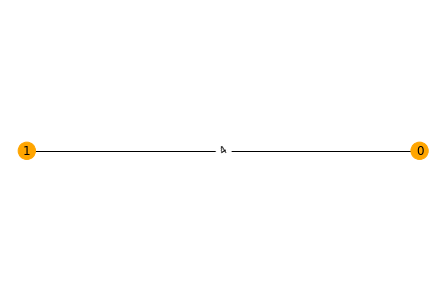

Liczba wierzchołków: 1
Liczba krawędzi: 0


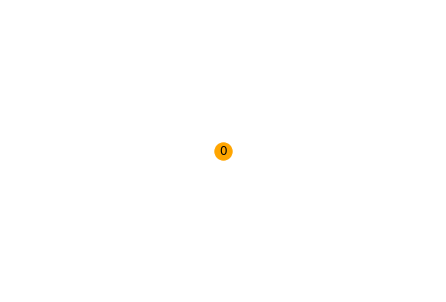

Liczba wierzchołków: 0
Liczba krawędzi: 0


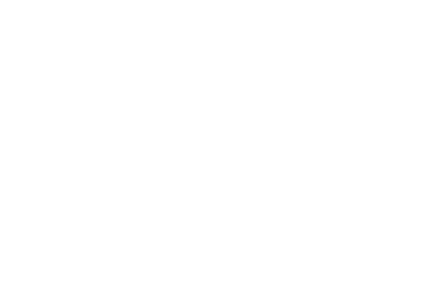

Liczba wierzchołków: 0
Liczba krawędzi: 0


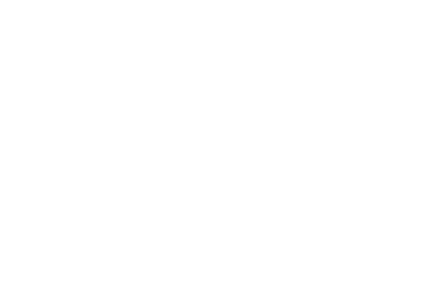

<Figure size 432x288 with 0 Axes>

In [108]:
draw(create_rand_consistent_weighted_graph(2))
draw(create_rand_consistent_weighted_graph(1))
draw(create_rand_consistent_weighted_graph(0))
draw(create_rand_consistent_weighted_graph(-5))

# Zadanie 2. Implementacja

In [158]:
import math
from typing import Dict, Tuple, List


def dijkstra(graph: Graph =None, start_vertex: int =0) -> Tuple[Dict[int, int], Dict[int, int]]:
    """
    Znajduje najkrótsze odległość od wejściowego wierzchołka do każdego innego
    :param graph: wejściowy graf
    :param start_vertex: początkowy wierzchołek
    :return: słownik najkrótszych odległości oraz słownik poprzedników wierzchołka
    """
    if not isinstance(graph, Graph) or not isinstance(start_vertex, int) or graph is None:
        return
    
    # poprzednicy wierzcholka
    predecessors = {}

    # najkrotsze odleglosci trasy do wierzcholkow
    distances = {}

    # lista wierzchołkow grafu, kluczem - aktualnie wyliczona odleglosc
    list_of_vertices = []

    vertices = list(graph.get_vertices())  # lista wierzcholkow
    vertices_ids = [v.get_id() for v in vertices]  # lista id wierzcholkow

    # INIT
    for vertex in vertices_ids:
        distances[vertex] = math.inf  # gorne ograniczenie wagi najkrotszej sciezki
        predecessors[vertex] = None  # chwilowy brak poprzednika
        list_of_vertices.append(vertex)
    distances[start_vertex] = 0  # najkrotsza sciezka ze start_vertex do start_vertex

    # iterujemy dopoki zbior wierzcholkow nie bedzie pusty
    while list_of_vertices:
        # usuwamy pierwszy wierzcholek w kazdej iteracji
        list_of_vertices.sort(key=lambda n: distances[n])  # zeby zaczac od start_vertex, czyli od distance=0
        u = list_of_vertices.pop(0)
        for v in graph.find_neighbours(u):
            if v in list_of_vertices:
                edge_weight = graph.find_edge(u, v).get_weight()
                # relaksacja krawedzi - poprawienie rozwiazania
                if distances[v] > distances[u] + edge_weight:
                    distances[v] = distances[u] + edge_weight
                    predecessors[v] = u

    # print("Odległości:\n" + str(distances))
    # print("Poprzednicy:\n" + str(predecessors))
    return distances, predecessors


def get_trails(predecessors: Dict[int, int]) -> Dict[int, List[int]]:
    """
    Zwraca słownik z wszystkimi sciezkami do kazdego wierzcholka
    """
    trails = {}
    for vertex in predecessors.keys():
        trails[vertex] = get_trail_to_vertex(predecessors, vertex)
    return trails


def get_trail_to_vertex(predecessors: Dict[int, int], vertex: int) -> List[int]:
    """
    Zwraca sciezke do danego wierzcholka
    """
    if predecessors[vertex] is None:  # przejscie z tego samego wierzcholka do tego samego
        return [vertex]
    return get_trail_to_vertex(predecessors, predecessors[vertex]) + [vertex]


# Zadanie 2. - przykład wywołania

### W drugim zadaniu używamy funkcji *dijkstra()* z argumentami: <u>graph</u> - obiektem typu Graph oraz <u>start_vertex</u> typu int będącym początkowym wierzchołkiem grafu <u>graph</u>, dla którego najkrótsze ścieżki do pozostałych wierzchołków znajdujemy. <br> Gdy do funkcji przekażemy nieprawidłowy argument odpowiadający grafowi, funkcja przerwie działanie instrukcją "return". <br>Podobnie dla argumentu <u>start_vertex</u> niebędącego intem.

### Przykład poprawnego wywołania:

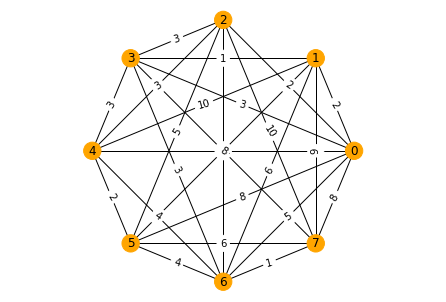

<Figure size 432x288 with 0 Axes>

In [159]:
# przypominamy wyglad grafu z poprzedniego zadania
draw(graph)

In [160]:
# ustawienie startowego wierzchołka
start_vertex = 3

In [161]:
print("\nZestaw 3, zadanie 2 - Dijkstra:")
distances, predecessors = dijkstra(graph, start_vertex)
trails = get_trails(predecessors)
print('START: s = ' + str(start_vertex))
for vertex, trail in zip(distances.keys(), trails.keys()):
    print(f"d({vertex}) = {distances[vertex]} ==> {trails[trail]}")


Zestaw 3, zadanie 2 - Dijkstra:
START: s = 3
d(0) = 3 ==> [3, 0]
d(1) = 1 ==> [3, 1]
d(2) = 3 ==> [3, 2]
d(3) = 0 ==> [3]
d(4) = 3 ==> [3, 4]
d(5) = 5 ==> [3, 4, 5]
d(6) = 3 ==> [3, 6]
d(7) = 4 ==> [3, 6, 7]


### *Testowanie innych wywołań:

In [162]:
dijkstra("graph", start_vertex)
dijkstra(graph,"")
dijkstra(3,graph)
dijkstra()
dijkstra(None,5)

In [163]:
wrong_start_vertex = -5
distances, predecessors = dijkstra(graph,wrong_start_vertex)
trails = get_trails(predecessors)
print('START: s = ' + str(wrong_start_vertex))
for vertex, trail in zip(distances.keys(), trails.keys()):
    print(f"d({vertex}) = {distances[vertex]} ==> {trails[trail]}")

START: s = -5
d(0) = inf ==> [0]
d(1) = inf ==> [1]
d(2) = inf ==> [2]
d(3) = inf ==> [3]
d(4) = inf ==> [4]
d(5) = inf ==> [5]
d(6) = inf ==> [6]
d(7) = inf ==> [7]


# Zadanie 3. Implementacja

In [164]:
from typing import List


def create_distances_matrix(g: Graph = None) -> List[List[int]]:
    """
    Funkcja tworzy i zwraca macierz odleglosci
    """
    if not isinstance(g, Graph) or None:
        return
    matrix = [[0 for v in g.get_vertices()] for v in g.get_vertices()]
    list_of_vertices = [x.get_id() for x in g.get_vertices()]
    for start_vertex in list_of_vertices:
        # wywolujemy dijkstre na kazdym wierzcholku znajdujac najkrotsze odleglosci dla kazdej pary wierzcholkow
        distances, predecessors = dijkstra(g, start_vertex)
        for end_vertex, distance in distances.items():
            # macierz odleglosci - najkrotsza odleglosc od wierzcholka start_vertex do wierzcholka end_vertex
            matrix[start_vertex][end_vertex] = distance

    return matrix


# Zadanie 3. - przykład wywołania

### Funkcja *create_distances_matrix()* przyjmuje argument <u>g</u> będący obiektem typu Graph, dla którego tworzy macierz odległości. <br> W przypadku podania złego argumentu funkcja kończy działanie instrukcją "return". 

### Przykład poprawnego wywołania:

In [165]:
print("\nZestaw 3, zadanie 3 - macierz odległości:")
distances_matrix = create_distances_matrix(graph)
for row in distances_matrix:
    print(*row, sep='\t')


Zestaw 3, zadanie 3 - macierz odległości:
0	2	2	3	4	6	5	6
2	0	4	1	4	6	4	5
2	4	0	3	3	5	4	5
3	1	3	0	3	5	3	4
4	4	3	3	0	2	4	5
6	6	5	5	2	0	4	5
5	4	4	3	4	4	0	1
6	5	5	4	5	5	1	0


### *Testowanie innych wywołań:

In [166]:
create_distances_matrix()
create_distances_matrix("")
create_distances_matrix(Graph())

[]

# Zadanie 4. Implementacja

In [86]:
from typing import List

'''
Funkcja wypisuje zadana macierz (liste wielu list) w estetycznej formie.
'''
def print_matrix(matrix: List[List]) -> None:
    for row in matrix:
        print(*row, sep='\t')

'''
Funkcja dla zadanego wierzcholka zwraca indeks minimalnej wartosci.
'''
def find_min_index(vector: List[int]) -> int:
    min_index = 0
    
    for i in range(1, len(vector)):
        if vector[i] < vector[min_index]:
            min_index = i
            
    return min_index

'''
Funkcja dla zadanej macierzy liczy sumy elementow w kazdym z wierszy i zwraca
je w postaci listy.
'''

def get_sum_vector(matrix: List[List]) -> list:
    sum_vector = list()
    
    for row in matrix:
        sum_vector.append(sum(row))
        
    return sum_vector

'''
Funkcja znajduje centrum grafu - dla zadanej macierzy odleglesci
dla calego grafu, funkcja zwraca indeks wierzcholksa, dla ktorego suma odleglosci
do wszystkich pozostalych wierzcholkow jest minimalna.
'''
def find_graph_center(distances_matrix: List[List]) -> int:
    sum_vector = get_sum_vector(distances_matrix) # pobieramy wektor sum kazdego z wierszy macierzy
    min_index = find_min_index(sum_vector) # odnajdujemy dla ktorego wierzcholka suma w wierszu jest najmniejsza
    
    return min_index

'''
Funkcja znajduje centrum minimax grafu - dla zadanej macierzy odleglosci
dla calego grafu, funkcja zwraca indeks wierzcholka, dla ktorego odleglosc
do najdalszego wierzcholka jest minimalna.
'''
def find_minimax_center(distances_matrix: List[List]) -> int:
    max_distances_vector = list()
    
    for row in distances_matrix:
        row.sort() # sortujemy rosnaco kazdy z wierszy w macierzy
        max_distances_vector.append(row[len(row) - 1]) # dodajemy najdalsze odleglosci do wektora
        
    min_index = find_min_index(max_distances_vector) # znajdujemy indeks minimalnej wartosci w wektorze
    
    return min_index

# Zadanie 4. - przykład wywołania

In [87]:
distances_matrix = create_distances_matrix(graph)
print_matrix(distances_matrix)
graph_center = find_graph_center(distances_matrix)
minimax_graph_center = find_minimax_center(distances_matrix)
print(f'Centrum grafu to wierzcholek: {graph_center}')
print(f'Centrum minimax grafu to wierzcholek: {minimax_graph_center}')

0	2	1	6	4	5	1	4
2	0	3	5	2	3	3	3
1	3	0	5	4	6	2	5
6	5	5	0	7	2	5	2
4	2	4	7	0	5	5	5
5	3	6	2	5	0	6	4
1	3	2	5	5	6	0	3
4	3	5	2	5	4	3	0
Centrum grafu to wierzcholek: 1
Centrum minimax grafu to wierzcholek: 1


# Zadanie 5. Implementacja

In [88]:
from zad1 import graph, draw
from ex2 import create_graph_visualization
from random import randrange
from collections import namedtuple
from typing import List

'''
Named tuple dla reprezentacji krawedzi - uzywane jedynie na potrzeby tego zadania
'''
EdgePrim = namedtuple('EdgePrim', 'from_vertex to_vertex weight');

'''
Prosta klasa w formie struktury do przechowywania macierzy sasiedztwa i wag
grafu wazonego.
'''
class GraphPrim:
    def __init__(self, neighborhood_matrix, weight_matrix):
        self.n_matrix = neighborhood_matrix
        self.weight_matrix = weight_matrix

'''
Funkcja przeksztalca listy obiektow typow Edge i Vertex do jednej z reprezentacji "niskopoziomowych"
tzn. do macierzy sasiedztwa
'''
def edges_and_vertices_to_adjacency_matrix(edges: List[Edge], vertices: List[Vertex]) -> List[list]:
    matrix = list()
    
    for i in range(len(vertices)):
        matrix.append(list())
        for j in range(len(vertices)):
            matrix[i].append(0)
    
    for edge in edges:
        matrix[edge.vertices[0].id][edge.vertices[1].id] = 1
        matrix[edge.vertices[1].id][edge.vertices[0].id] = 1
        
    return matrix

'''
Funkcja przeksztalca listy obiektow typu Edge i Vertex do jednej z reprezentacji "niskopoziomowych"
tzn. do macierzy wag
'''
def edges_and_vertices_to_weights_matrix(edges: list, vertices: list) -> list:
    matrix = list()
    
    for i in range(len(vertices)):
        matrix.append(list())
        for j in range(len(vertices)):
            matrix[i].append(0)
            
    for edge in edges:
        matrix[edge.vertices[0].id][edge.vertices[1].id] = edge.get_weight()
        matrix[edge.vertices[1].id][edge.vertices[0].id] = edge.get_weight()
        
    return matrix

'''
Zadaniem funkcji jest przeksztalcenie grafu z postaci "niskopozimowej" (jako obiektu GraphPrim zlozonego
z macierzy sasiedztwa i macierzy wag oraz listy EdgePrim) do obiektu typu Graph, ktory mozna narysowac
przy pomocy metody pomocniczej do wizualizacji ze skryptu z zadaniem 1.
'''
def convert_to_drawable_graph(graphPrim: GraphPrim, edgesPrim: List[EdgePrim]) -> Graph:
    graph = Graph(weighted=True)
    edges = set()
    
    for i in range(len(graphPrim.n_matrix)):
        graph.add_vertex(Vertex(i))
        
    for edge in edgesPrim:
        edges.add((Vertex(edge.from_vertex), Vertex(edge.to_vertex), edge.weight))
        
    graph.add_edges(edges)
    
    return graph


'''
Dla grafu zadanego w postaci macierzy sasiedztwa i macierzy wag (obiekt typu GraphPrim) oraz dowolnego wybranego
indeksu wierzcholka
funkcja znajduje minimalne drzewo rozpinajace i zwraca je w postaci listy krawedzi (lista obiektow
typu EdgePrim). Jest to przyklad najmniej efektywnej implementacji algorytmu (uzycie macierzy sasiedztwa
oraz zwyklej kolejki priorytetowej (poszukiwanie minimalnej wagi w kolejnych iteracjach)).

Graf musi byc oczywisce spojny, w przeciwnym wypadku nastapi blad (np. usuwanie pustego elementu z listy).
'''    
def find_spanning_tree(graph: GraphPrim, starting_vertex: int) -> List[EdgePrim]:    
    NUM_OF_VERTICES = len(graph.n_matrix)
    tree = [starting_vertex] # tutaj bd przechowywane wierzcholki, ktore jud dodano do rzewa
    vertices = list(range(0, NUM_OF_VERTICES)) # tutaj przechowywane sa wszystkie wierzcholki 
    # ktorych nie dodano jeszcze do budowanego drzewa
    vertices.remove(starting_vertex) # na wstepie musimy usunac z listy niedodanych wierzcholkow wierzcholek startowy
    edges = list() # lista do przechowywania krawedzi
    
    '''
    Algorytm dziala dopoki nie dodano wszystkich wierzcholkow do drzewa.
    '''
    while len(tree) < NUM_OF_VERTICES:
        lightest_weight = None
        current_edge = None
        chosen_vertex = None
        
        '''
        Musimy przeiterowac po wszystkich wierzcholkach juz dodane do drzewa i tymi ktorych jeszcze nie
        dodano. Sprawdzamy czy istnieje miedzy nimi krawedz (linia 108.). Jeli tak, to sprawdzamy czy nowa
        krawedz ma mniejsza wage od uprzednio rozwazanych. Jesli tak to zapisujemy ja jako najlzejsza krawedz
        (current_edge). Po iteracjach zapisujemy do drzewa wiecholek ktory utworzyl najlzejsza krawedz.
        Zapisujemy rowniez sama krawedz na potrzeby zwracanej listy. Z wierzcholkow niedodanych do drzewa
        usuwamy wybrany wierzcholek.
        '''
        for from_vertex in tree:
            for to_vertex in vertices:
                if graph.n_matrix[from_vertex][to_vertex] == 1:
                    current_weight = graph.weight_matrix[from_vertex][to_vertex]
                    if lightest_weight is None or current_weight < lightest_weight: 
                        lightest_weight = current_weight
                        current_edge = EdgePrim(from_vertex, to_vertex, current_weight)
                        chosen_vertex = to_vertex
                    
        tree.append(chosen_vertex) # w kazdej iteracji zewnetrznej petli dolaczamy nowy wierzcholek do drzewa
        edges.append(current_edge) # do listy krawedzi stanowiacej rezultat dzialania algorytmu dolaczamy nowa krawedz
        vertices.remove(chosen_vertex) # z listy niedodanych jeszcze wierzcholkow usuwamy
            
    return edges;

# Zadanie 5. - przykład wywołania

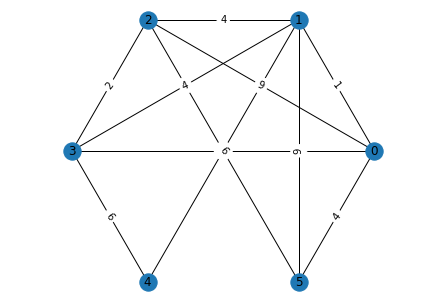

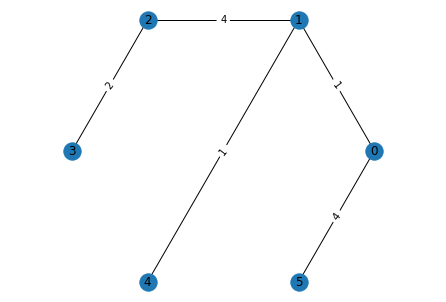

<Figure size 432x288 with 0 Axes>

In [89]:
adj_matrix = edges_and_vertices_to_adjacency_matrix(graph.get_edges(), 
                                                        graph.get_vertices())
    
weights_matrix = edges_and_vertices_to_weights_matrix(graph.get_edges(),
                                                          graph.get_vertices())
    
graphPrim = GraphPrim(adj_matrix, weights_matrix)
edgesPrim = find_spanning_tree(graphPrim, starting_vertex=0)
    
result_graph = convert_to_drawable_graph(graphPrim, edgesPrim)
   
draw(graph)    
draw(result_graph)